In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


In [3]:
# Reshape for CNN and normalize pixel values
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 51s 26ms/step - accuracy: 0.9057 - loss: 0.2995 - val_accuracy: 0.9833 - val_loss: 0.0484
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9860 - loss: 0.0445 - val_accuracy: 0.9892 - val_loss: 0.0363
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 25ms/step - accuracy: 0.9915 - loss: 0.0261 - val_accuracy: 0.9873 - val_loss: 0.0396
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 26ms/step - accuracy: 0.9937 - loss: 0.0200 - val_accuracy: 0.9898 - val_loss: 0.0336
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 25ms/step - accuracy: 0.9960 - loss: 0.0135 - val_accuracy: 0.9901 - val_loss: 0.0331


In [5]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9871 - loss: 0.0422
Test Accuracy: 0.9901


In [10]:
model.save("digit_model_v1.keras", save_format="keras")
print("Model saved!")


from google.colab import files
files.download("digit_model_v1.keras")

Model saved!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted: 2


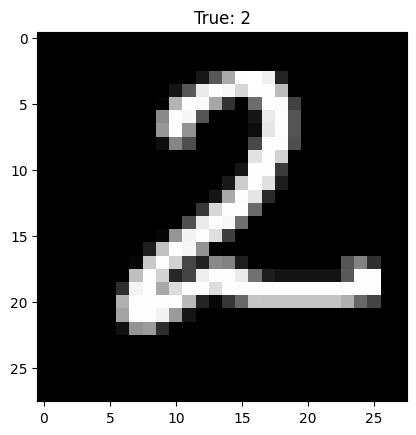

In [9]:
import numpy as np
import matplotlib.pyplot as plt
i = np.random.randint(0, len(x_test))
img = x_test[i].reshape(1, 28, 28, 1)
pred = model.predict(img)
print("Predicted:", np.argmax(pred))
plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
plt.title(f"True: {np.argmax(y_test[i])}")
plt.show()